# AVACADO PROJECT

Submitted by:Sucharitha A M
             1829 batch

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier,export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,precision_recall_curve,roc_curve
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import cross_val_score
import joblib
import warnings
warnings.filterwarnings('ignore')

# Examining The Data

In [2]:
df=pd.read_csv("Avacadoproject.csv")
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0.0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015.0,Albany
1,1.0,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015.0,Albany
2,2.0,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015.0,Albany
3,3.0,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015.0,Albany
4,4.0,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015.0,Albany


In [3]:
np.where(pd.isnull(df))[0]

array([ 1517,  1517,  1517, ..., 16467, 16467, 16467], dtype=int64)

Here removing the nan sets

In [4]:
df.drop(list(np.where(pd.isnull(df))[0]),inplace=True)

In [5]:
df.shape

(1517, 14)

Dataset contains 1517 rows and 14 columns

In [6]:
df = df.drop(['Unnamed: 0'],axis=1)

In [7]:
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015.0,Albany
1,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015.0,Albany
2,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015.0,Albany
3,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015.0,Albany
4,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015.0,Albany


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1517 entries, 0 to 1516
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          1517 non-null   object 
 1   AveragePrice  1517 non-null   float64
 2   Total Volume  1517 non-null   float64
 3   4046          1517 non-null   float64
 4   4225          1517 non-null   float64
 5   4770          1517 non-null   float64
 6   Total Bags    1517 non-null   float64
 7   Small Bags    1517 non-null   float64
 8   Large Bags    1517 non-null   float64
 9   XLarge Bags   1517 non-null   float64
 10  type          1517 non-null   object 
 11  year          1517 non-null   float64
 12  region        1517 non-null   object 
dtypes: float64(10), object(3)
memory usage: 165.9+ KB


This method print the information about the DataFrame including the index type and column type,non-null values and memory usage.

In [9]:
df.shape

(1517, 13)

Dataset contains 1517 rows 13 rows

In [10]:
df.columns

Index(['Date', 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year',
       'region'],
      dtype='object')

Dataset contains 13 columns

In [11]:
df.dtypes

Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year            float64
region           object
dtype: object

In [12]:
df.isnull().sum()

Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

Dataset contains all sum will be zeros 

# Summary Statistics

In [13]:
df.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,1517.000000,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1517.000000,1517.000000
mean,1.074990,1.601879e+06,6.464387e+05,6.114375e+05,5.040550e+04,2.935974e+05,2.487736e+05,4.264205e+04,2181.771074,2015.162821
std,0.188891,4.433143e+06,1.947614e+06,1.672906e+06,1.377812e+05,7.579765e+05,6.474765e+05,1.182157e+05,7455.712144,0.369324
min,0.490000,3.875074e+04,4.677200e+02,1.783770e+03,0.000000e+00,3.311770e+03,3.311770e+03,0.000000e+00,0.000000,2015.000000
25%,0.980000,1.474700e+05,2.040034e+04,4.147606e+04,9.112500e+02,3.620689e+04,2.972722e+04,5.407400e+02,0.000000,2015.000000
50%,1.080000,4.027919e+05,8.175117e+04,1.186649e+05,7.688170e+03,7.397906e+04,6.237569e+04,5.044350e+03,0.000000,2015.000000
75%,1.190000,9.819751e+05,3.775785e+05,4.851503e+05,2.916730e+04,1.576097e+05,1.461994e+05,2.926767e+04,401.480000,2015.000000
max,1.680000,4.465546e+07,1.893304e+07,1.895648e+07,1.381516e+06,6.736304e+06,5.893642e+06,1.121076e+06,108072.790000,2016.000000


1 The mean is more than median 50% percentile in all columns.

2 There is a large difference in 75% percentile and max.

3 The 1 and 2 observation suggest that there are extreme outliers present in these three columns.

In [14]:
df.year.unique()

array([2015., 2016.])

Target/dependent variables is discrete and categorial in nature

In [15]:
df.year.value_counts()

2015.0    1270
2016.0     247
Name: year, dtype: int64

Here year contains categorical values of 2015 and 2016

# Data Visualization

<AxesSubplot:xlabel='Date', ylabel='count'>

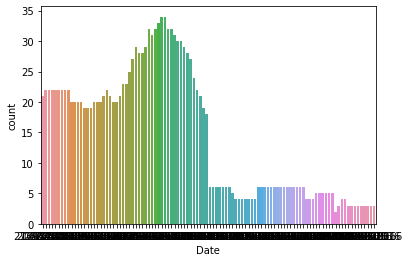

In [16]:
sns.countplot(df['Date'])

Here Data in not normally distributed in the all columns.

<AxesSubplot:xlabel='AveragePrice', ylabel='count'>

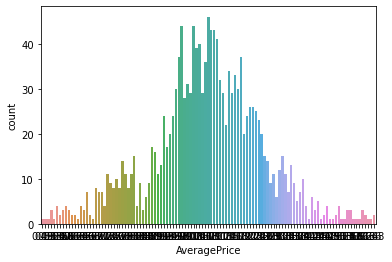

In [17]:
sns.countplot(df['AveragePrice'])

Here Data in not normally distributed in the all columns.

<AxesSubplot:xlabel='Total Volume', ylabel='count'>

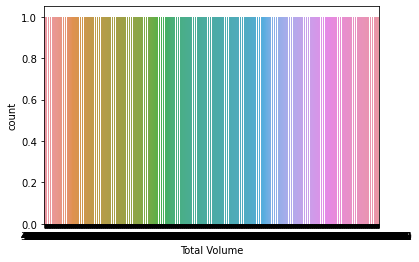

In [18]:
sns.countplot(df['Total Volume'])

Here Data is normally distributed in the all columns.

<AxesSubplot:xlabel='4046', ylabel='count'>

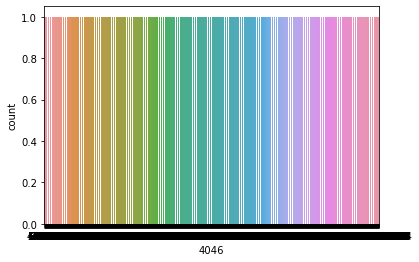

In [19]:
sns.countplot(df['4046'])

Here Data is normally distributed in the all columns.

<AxesSubplot:xlabel='type', ylabel='count'>

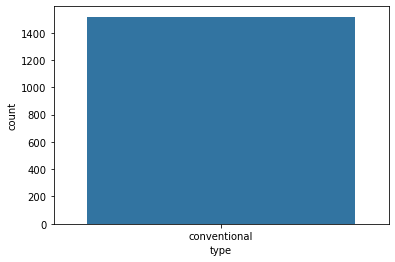

In [20]:
sns.countplot(df['type'])

Here Data is normally distributed in the all columns.

<AxesSubplot:>

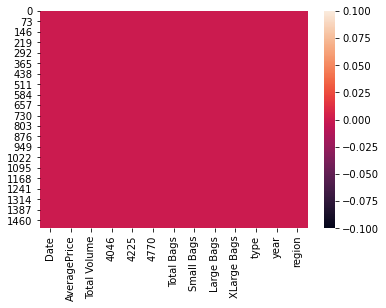

In [21]:
sns.heatmap(df.isnull())

Here heatmap contains all the nullvalues of the dataset.

In [22]:
dfcor=df.corr()
dfcor

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
AveragePrice,1.000000,-0.140470,-0.190096,-0.092084,-0.100567,-0.111597,-0.097682,-0.177480,-0.048284,0.178683
Total Volume,-0.140470,1.000000,0.985568,0.987154,0.934347,0.967689,0.960642,0.910226,0.521717,-0.004189
4046,-0.190096,0.985568,1.000000,0.951952,0.898570,0.930395,0.922278,0.884229,0.474063,-0.040439
4225,-0.092084,0.987154,0.951952,1.000000,0.927757,0.951779,0.943988,0.900496,0.504718,-0.007254
4770,-0.100567,0.934347,0.898570,0.927757,1.000000,0.926405,0.923607,0.840523,0.646053,0.029222
Total Bags,-0.111597,0.967689,0.930395,0.951779,0.926405,1.000000,0.997341,0.911336,0.601856,0.090108
Small Bags,-0.097682,0.960642,0.922278,0.943988,0.923607,0.997341,1.000000,0.879131,0.611300,0.106382
Large Bags,-0.177480,0.910226,0.884229,0.900496,0.840523,0.911336,0.879131,1.000000,0.447779,-0.018678
XLarge Bags,-0.048284,0.521717,0.474063,0.504718,0.646053,0.601856,0.611300,0.447779,1.000000,0.218342
year,0.178683,-0.004189,-0.040439,-0.007254,0.029222,0.090108,0.106382,-0.018678,0.218342,1.000000


<AxesSubplot:>

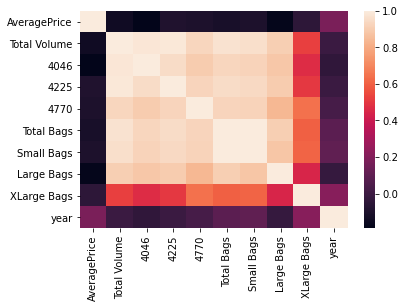

In [23]:
sns.heatmap(dfcor)

Here heatmap containes the difference of corresponding values of dataset.

Light shades are higly corrolated

<AxesSubplot:>

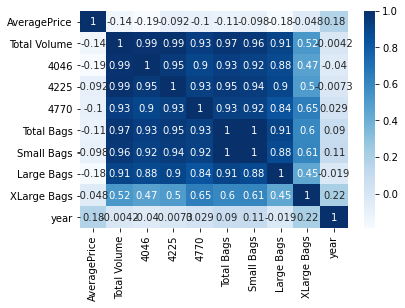

In [24]:
plt.figure(figsize=(6,4))
sns.heatmap(dfcor,cmap='Blues',annot=True)

 Dark shades are higly correlated

<AxesSubplot:>

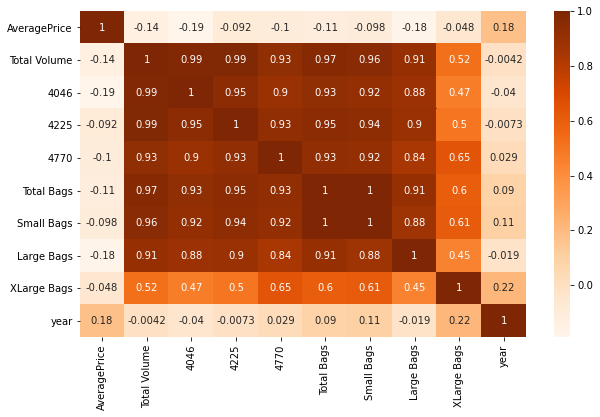

In [25]:
plt.figure(figsize=(10,6))
sns.heatmap(dfcor,cmap='Oranges',annot=True)

Light shades are higly correlated

year is higly correlated with Xlargebags

xlargebags is highly negatively correlated with smallbags

smallbags is higly positively correlated with averageprice

averageprice is negatively correlated with year


# Plotting Outliers

In [26]:
df.columns

Index(['Date', 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year',
       'region'],
      dtype='object')

<AxesSubplot:>

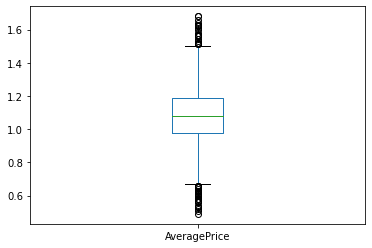

In [27]:
df['AveragePrice'].plot.box()

<AxesSubplot:>

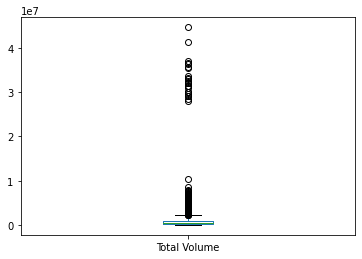

In [28]:
df['Total Volume'].plot.box()

Here Total Volume have  outside the viscous so we can find here outliers easily.

<AxesSubplot:>

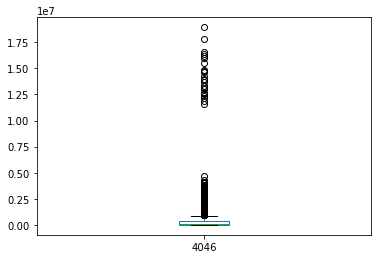

In [29]:
df['4046'].plot.box()

Here 4046 have no outside the viscous so we cant find here outliers easily.

<AxesSubplot:>

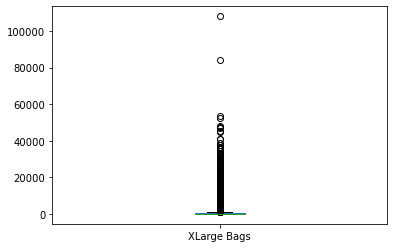

In [30]:
df['XLarge Bags'].plot.box()

Here xlargebags have  outside the viscous so we can find here outliers easily.

<AxesSubplot:>

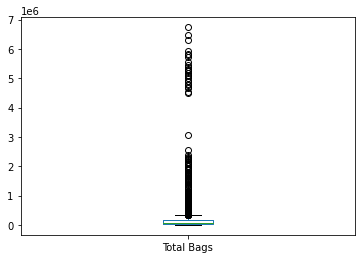

In [31]:
df['Total Bags'].plot.box()

Here Total Bags have outside the viscous so we can find here outliers easily.

<AxesSubplot:>

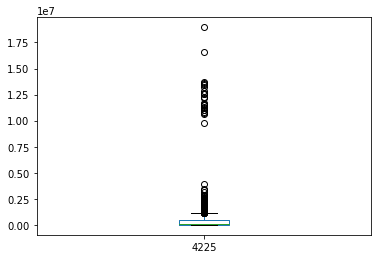

In [32]:
df['4225'].plot.box()

Here 4225 have  outside the viscous so we can find here outliers easily.

<AxesSubplot:>

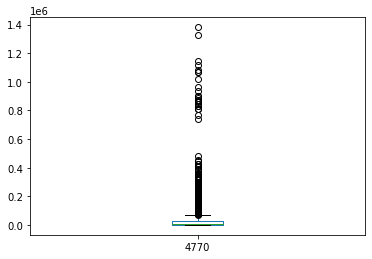

In [33]:
df['4770'].plot.box()

Here 4770 have  outside the viscous so we can find here outliers easily.

<AxesSubplot:>

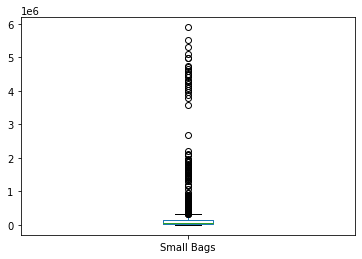

In [34]:
df['Small Bags'].plot.box()

Here small Bags have  outside the viscous so we can find here outliers easily.

In [35]:
df.shape

(1517, 13)

Dataset contains 1517 rows and 13 columns

# To check  Distribution of skewness

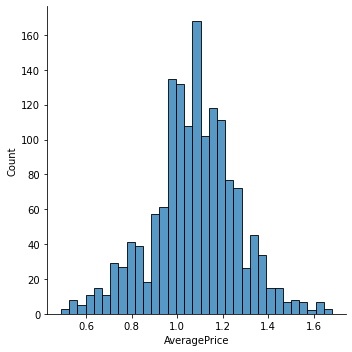

In [36]:
sns.displot(df['AveragePrice'])

Data is not normally distributed in these columns

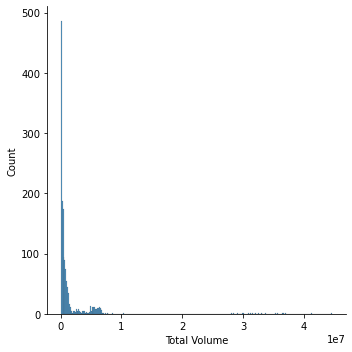

In [37]:
sns.displot(df['Total Volume'])

Data is not normally distributed in these columns

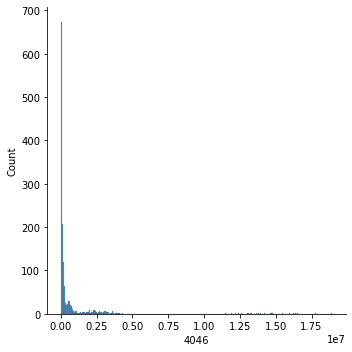

In [38]:
sns.displot(df['4046'])

Data is not normally distributed in these columns

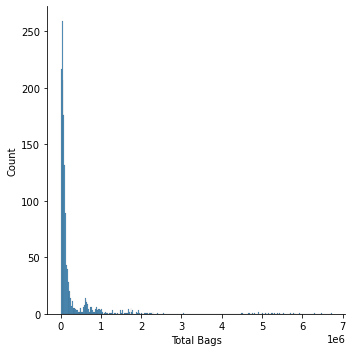

In [39]:
sns.displot(df['Total Bags'])

Data is not normally distributed in these columns

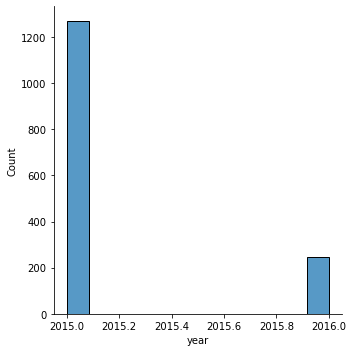

In [40]:
sns.displot(df['year'])

Data is not normally distributed in these columns

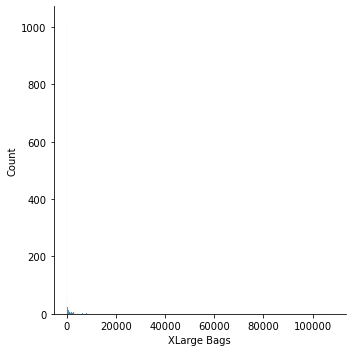

In [41]:
sns.displot(df['XLarge Bags'])

Data is not normally distributed in these columns

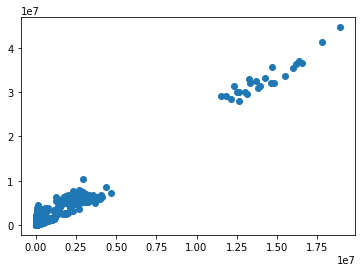

In [42]:
plt.scatter(df['4046'],df['Total Volume'])

sacttering of 4046 and total volume

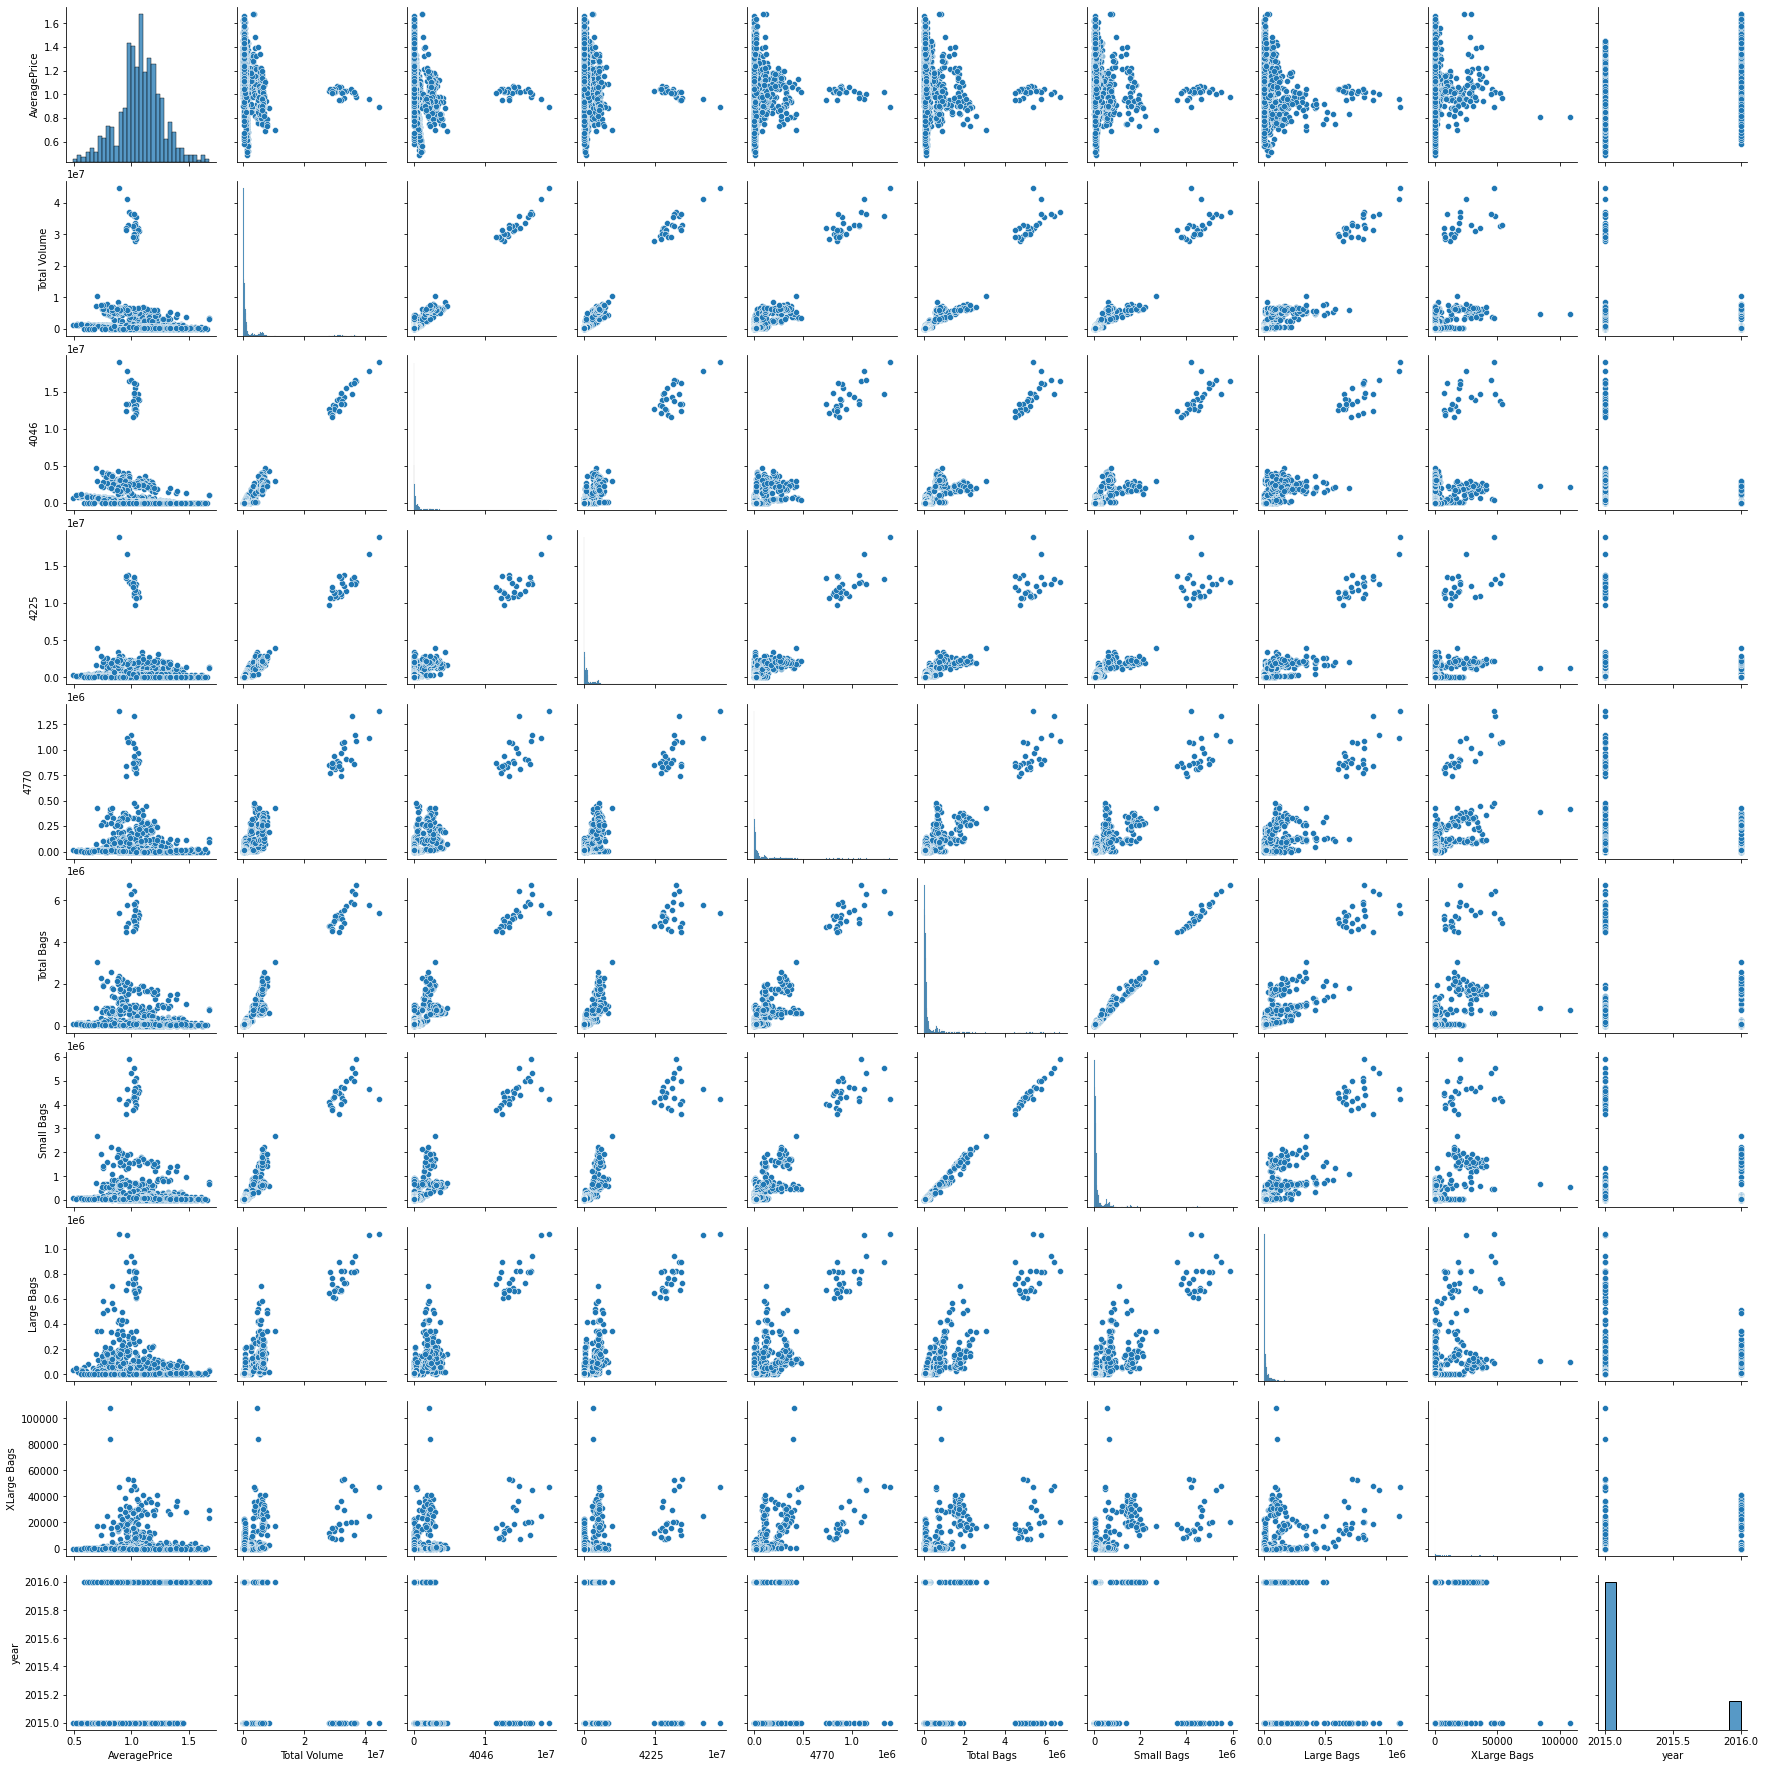

In [43]:
sns.pairplot(df)

Remove the missing values.

drop  the nagativitycorrelated columns.

remove the outliers.

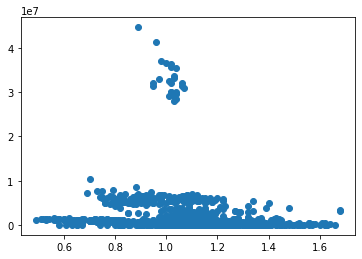

In [44]:
plt.scatter(df['AveragePrice'],df['Total Volume'])
plt.show()

Here scattering plot of averageprice and total volume

In [45]:
df.drop('Total Bags',axis=1,inplace=True)

In [46]:
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Small Bags,Large Bags,XLarge Bags,type,year,region
0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8603.62,93.25,0.0,conventional,2015.0,Albany
1,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9408.07,97.49,0.0,conventional,2015.0,Albany
2,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8042.21,103.14,0.0,conventional,2015.0,Albany
3,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5677.40,133.76,0.0,conventional,2015.0,Albany
4,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,5986.26,197.69,0.0,conventional,2015.0,Albany


In [47]:
df.shape

(1517, 12)

Dataset contains 1517 rows and 12 columns

In [48]:
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Small Bags,Large Bags,XLarge Bags,type,year,region
0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8603.62,93.25,0.0,conventional,2015.0,Albany
1,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9408.07,97.49,0.0,conventional,2015.0,Albany
2,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8042.21,103.14,0.0,conventional,2015.0,Albany
3,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5677.40,133.76,0.0,conventional,2015.0,Albany
4,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,5986.26,197.69,0.0,conventional,2015.0,Albany


In [49]:
df.columns

Index(['Date', 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year', 'region'],
      dtype='object')

# Encoding Method

In [50]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
df['year']=LE.fit_transform(df['year'])


In [51]:
df["year"].unique()

array([0, 1], dtype=int64)

In [52]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
df['region']=LE.fit_transform(df['region'])


In [53]:
df["region"].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50])

In [54]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
df['type']=LE.fit_transform(df['type'])


In [55]:
df["type"].unique()

array([0])

In [56]:
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Small Bags,Large Bags,XLarge Bags,type,year,region
0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8603.62,93.25,0.0,0,0,0
1,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9408.07,97.49,0.0,0,0,0
2,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8042.21,103.14,0.0,0,0,0
3,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5677.40,133.76,0.0,0,0,0
4,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,5986.26,197.69,0.0,0,0,0


In [57]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
df['Date']=LE.fit_transform(df['Date'])


In [58]:
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Small Bags,Large Bags,XLarge Bags,type,year,region
0,92,1.33,64236.62,1036.74,54454.85,48.16,8603.62,93.25,0.0,0,0,0
1,68,1.35,54876.98,674.28,44638.81,58.33,9408.07,97.49,0.0,0,0,0
2,44,0.93,118220.22,794.70,109149.67,130.50,8042.21,103.14,0.0,0,0,0
3,20,1.08,78992.15,1132.00,71976.41,72.58,5677.40,133.76,0.0,0,0,0
4,98,1.28,51039.60,941.48,43838.39,75.78,5986.26,197.69,0.0,0,0,0


In [59]:
df.columns

Index(['Date', 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year', 'region'],
      dtype='object')

# Removing Outliers

In [60]:
from scipy.stats import zscore
z=np.abs(zscore(df))
z

array([[1.37776563, 1.35048079, 0.34696593, ...,        nan, 0.44100815,
        1.3143384 ],
       [0.57857991, 1.45639674, 0.34907791, ...,        nan, 0.44100815,
        1.3143384 ],
       [0.22060582, 0.76783831, 0.33478463, ...,        nan, 0.44100815,
        1.3143384 ],
       ...,
       [1.51928262, 2.14485045, 0.32120275, ...,        nan, 2.26753179,
        0.88028586],
       [1.07807099, 2.09189247, 0.31878364, ...,        nan, 2.26753179,
        0.88028586],
       [0.27888526, 1.88006056, 0.3201721 , ...,        nan, 2.26753179,
        0.88028586]])

In [61]:
threshold=3
print(np.where(z>3))

(array([ 398,  401,  409,  412,  412,  760, 1016, 1017, 1059, 1182, 1182,
       1182, 1182, 1182, 1182, 1182, 1183, 1183, 1183, 1183, 1183, 1183,
       1184, 1184, 1184, 1184, 1184, 1184, 1184, 1185, 1185, 1185, 1185,
       1185, 1185, 1186, 1186, 1186, 1186, 1186, 1186, 1187, 1187, 1187,
       1187, 1187, 1187, 1187, 1188, 1188, 1188, 1188, 1188, 1188, 1189,
       1189, 1189, 1189, 1189, 1189, 1189, 1190, 1190, 1190, 1190, 1190,
       1190, 1190, 1191, 1191, 1191, 1191, 1191, 1191, 1191, 1192, 1192,
       1192, 1192, 1192, 1192, 1193, 1193, 1193, 1193, 1193, 1193, 1194,
       1194, 1194, 1194, 1194, 1194, 1195, 1195, 1195, 1195, 1195, 1195,
       1195, 1196, 1196, 1196, 1196, 1196, 1196, 1197, 1197, 1197, 1197,
       1197, 1197, 1198, 1198, 1198, 1198, 1198, 1198, 1198, 1199, 1199,
       1199, 1199, 1199, 1199, 1200, 1200, 1200, 1200, 1200, 1200, 1201,
       1201, 1201, 1201, 1201, 1201, 1202, 1202, 1202, 1202, 1202, 1202,
       1202, 1203, 1203, 1203, 1203, 1203, 1203, 1

In [62]:
df_new=df[(z<3).all(axis=1)]
df_new

,Date,AveragePrice,Total Volume,4046,4225,4770,Small Bags,Large Bags,XLarge Bags,type,year,region


In [63]:
df.shape

(1517, 12)

In [64]:
df_new.shape

(0, 12)

# StandardScler Method

In [65]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaledX = scaler.fit_transform(df)

In [66]:
scaledX

array([[ 1.37776563,  1.35048079, -0.34696593, ...,  0.        ,
        -0.44100815, -1.3143384 ],
       [ 0.57857991,  1.45639674, -0.34907791, ...,  0.        ,
        -0.44100815, -1.3143384 ],
       [-0.22060582, -0.76783831, -0.33478463, ...,  0.        ,
        -0.44100815, -1.3143384 ],
       ...,
       [-1.51928262,  2.14485045, -0.32120275, ...,  0.        ,
         2.26753179, -0.88028586],
       [ 1.07807099,  2.09189247, -0.31878364, ...,  0.        ,
         2.26753179, -0.88028586],
       [ 0.27888526,  1.88006056, -0.3201721 , ...,  0.        ,
         2.26753179, -0.88028586]])

In [67]:
from sklearn.decomposition import PCA

testpca = PCA()
Y = testpca.fit(scaledX)

In [68]:
Y.explained_variance_ratio_

array([5.49234065e-01, 1.52708584e-01, 9.30681326e-02, 7.75846925e-02,
       5.37299250e-02, 4.62092744e-02, 1.26073477e-02, 6.80656906e-03,
       4.90977659e-03, 3.14163309e-03, 3.25557929e-32, 1.18092836e-39])

In [69]:
var_cumu = np.cumsum(Y.explained_variance_ratio_)*100
var_cumu

array([ 54.92340649,  70.1942649 ,  79.50107817,  87.25954741,
        92.63253992,  97.25346735,  98.51420213,  99.19485903,
        99.68583669, 100.        , 100.        , 100.        ])

In [70]:
k = np.argmax(var_cumu>99)
print("Number of components explaining 99% variance:",k)

Number of components explaining 99% variance: 7


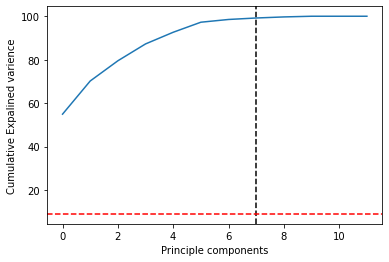

In [71]:
plt.ylabel('Cumulative Expalined varience')
plt.xlabel('Principle components')
plt.axvline(x=k, color="k",linestyle="--")
plt.axhline(y=9, color="r",linestyle="--")

plt.plot(var_cumu)
plt.show()

# Data Visualization of Varience

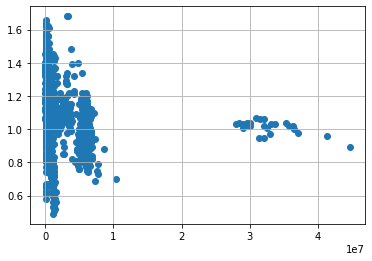

In [72]:
var = 'Total Volume'
plt.scatter(x = df[var],y = df['AveragePrice'],)
plt.grid(True)

Here different varience of total volume and averageprice

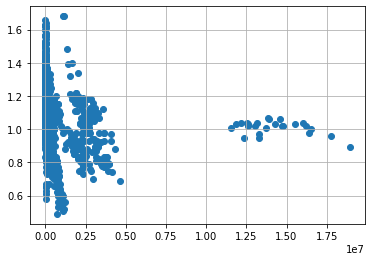

In [73]:
var = '4046'
plt.scatter(x = df[var],y = df['AveragePrice'],)
plt.grid(True)

Here different varience of 4046 and aveargeprice

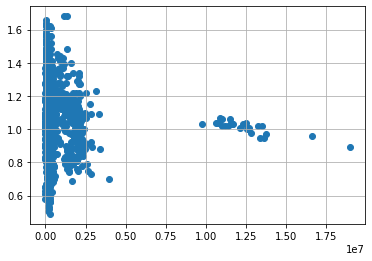

In [74]:
var = '4225'
plt.scatter(x = df[var],y = df['AveragePrice'],)
plt.grid(True)

Here different varience of 4225 and aveargeprice

# Missing Value Treatments

In [75]:
df.isnull().sum()

Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

Here dataset contains the sum values will be zeros

In [76]:
df["AveragePrice"]=df["AveragePrice"].fillna(df["AveragePrice"].mean())
df["Total Volume"]=df["Total Volume"].fillna(df["Total Volume"].median())


In [77]:
df.isnull().sum()

Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

# Checking Skewness

In [78]:
df.skew()

Date            0.012623
AveragePrice   -0.109444
Total Volume    6.200138
4046            6.051830
4225            6.394926
4770            5.405164
Small Bags      5.355185
Large Bags      5.144495
XLarge Bags     5.775077
type            0.000000
year            1.828332
region          0.288146
dtype: float64

Here the dataset contains skewness values

# Model Engineering

In [79]:
x_train=df.drop("AveragePrice",axis=1)
y_train=df["AveragePrice"]

In [80]:
x_train.head()

,Date,Total Volume,4046,4225,4770,Small Bags,Large Bags,XLarge Bags,type,year,region
0,92,64236.62,1036.74,54454.85,48.16,8603.62,93.25,0.0,0,0,0
1,68,54876.98,674.28,44638.81,58.33,9408.07,97.49,0.0,0,0,0
2,44,118220.22,794.70,109149.67,130.50,8042.21,103.14,0.0,0,0,0
3,20,78992.15,1132.00,71976.41,72.58,5677.40,133.76,0.0,0,0,0
4,98,51039.60,941.48,43838.39,75.78,5986.26,197.69,0.0,0,0,0


In [81]:
y_train.head()

0    1.33
1    1.35
2    0.93
3    1.08
4    1.28
Name: AveragePrice, dtype: float64

In [82]:
x_train.shape

(1517, 11)

Here x_train contains 1517 rows and 11 columns

In [83]:
y_train.shape

(1517,)

Here y_train contains 1517 rows and zero columns

In [84]:
df.isnull().sum()

Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

# Regressor Methods

In [85]:
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score

In [86]:
x=df.drop(["AveragePrice"],axis=1)
y=df["AveragePrice"]
x_train, x_test, y_train, y_test=train_test_split(x, y, random_state=50, test_size=0.2)

In [87]:
from sklearn.metrics import mean_squared_error
for i in range(200):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=50)
    from sklearn.tree import DecisionTreeRegressor
    lm=DecisionTreeRegressor()
    lm.fit(x_train,y_train)
    y_pred=lm.predict(x_test)
    mse=mean_squared_error(y_test,y_pred)
    rmse = np.sqrt(mse)
    print(rmse)

0.11390352566051122
0.11300034932409907
0.1169514069130738
0.11908781589540066
0.11812543511476532
0.11476807276553784
0.11180339887498948
0.11197832262023799
0.11655555485870699
0.11630976109646082
0.12029432108046717
0.11832159566199232
0.11412423977956286
0.12005755198850959
0.11384575206461546
0.11274242885071216
0.11215150701758665
0.1154353886265751
0.11580666738373191
0.11526713823937305
0.1156048168728731
0.11567450931498763
0.11524145133268306
0.11673322036525037
0.11556782014311588
0.11843830283716231
0.1157811001756968
0.11642283416834291
0.11990264691341099
0.11704980946048925
0.11507291738627934
0.11770418988204912
0.11777962248913948
0.11612719886309784
0.11210310104166563
0.11623903457055525
0.11403629385327056
0.11417755102424793
0.11878219785100706
0.11342456338442466
0.1173333084130755
0.11496137795387036
0.11908091013212294
0.11745659892734402
0.11508863860886576
0.11294065745011031
0.11283284096396759
0.11731928992912327
0.11739216776527972
0.11495565506567716
0.113

In [88]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor()
regressor.fit(x_train,y_train)

DecisionTreeRegressor()

In [89]:
y_pred = regressor.predict(x_test)

In [90]:
y_pred

array([1.15, 0.95, 1.15, 0.67, 0.65, 0.95, 1.14, 1.01, 0.74, 1.2 , 0.94,
       1.18, 1.07, 1.18, 1.22, 1.05, 1.11, 1.23, 0.93, 1.04, 1.04, 0.73,
       0.99, 0.87, 1.08, 1.15, 0.94, 1.39, 1.4 , 1.1 , 1.17, 1.05, 1.16,
       1.09, 1.04, 1.11, 1.23, 0.9 , 1.08, 1.3 , 1.19, 1.01, 1.16, 1.29,
       1.1 , 0.98, 1.14, 1.15, 0.76, 1.08, 1.07, 1.11, 0.96, 1.2 , 1.08,
       1.17, 0.63, 1.08, 0.96, 1.15, 1.01, 1.24, 1.47, 1.28, 1.24, 1.04,
       1.21, 0.78, 0.74, 0.67, 0.99, 1.05, 1.09, 1.2 , 0.99, 1.28, 1.32,
       1.05, 0.75, 1.4 , 1.09, 1.24, 0.85, 0.97, 1.11, 1.26, 0.98, 1.28,
       1.15, 1.19, 0.94, 1.1 , 1.1 , 1.28, 0.97, 1.03, 1.17, 0.94, 1.18,
       1.03, 1.19, 0.99, 0.98, 1.52, 0.52, 1.1 , 0.92, 0.75, 1.17, 1.13,
       0.75, 1.27, 1.11, 1.16, 1.03, 0.82, 0.99, 1.26, 1.22, 1.12, 1.05,
       1.16, 1.41, 1.05, 1.26, 0.97, 0.89, 0.99, 0.58, 1.22, 1.03, 1.25,
       0.93, 0.7 , 1.11, 0.9 , 1.04, 1.26, 1.13, 1.06, 1.18, 1.21, 1.07,
       1.35, 1.16, 0.92, 1.16, 1.01, 1.56, 1.02, 1.

In [91]:
dt_accuracy = round(regressor.score(x_train,y_train)*100,2)
dt_accuracy

100.0

The Test Accuracy of DecisionTreeRegressor is 100

In [92]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

In [93]:
y_pred = regressor.predict(x_test)

In [94]:
y_pred

array([1.10654088, 1.01837811, 1.05384599, 1.01805241, 1.11282887,
       1.01629925, 1.10738044, 1.16894855, 0.81299449, 1.05852753,
       1.16899264, 1.12620999, 0.92008607, 1.07638708, 1.06962414,
       1.04190473, 1.03368164, 1.07708868, 1.15500567, 1.0644966 ,
       1.1448929 , 1.07281638, 1.08207756, 0.8032569 , 1.04509509,
       0.79252161, 1.0390348 , 1.16189929, 1.11282215, 1.0647183 ,
       1.09154476, 1.02956476, 0.93902162, 1.14135841, 1.05849923,
       1.07063369, 1.0813729 , 0.99999139, 1.07634464, 1.10124805,
       1.12772033, 1.20417933, 1.12411551, 1.06388935, 1.04219388,
       1.0858425 , 1.09317162, 1.19890021, 1.03767067, 1.09223522,
       1.0885054 , 1.03558469, 1.21566088, 1.12644837, 1.10356229,
       1.2210458 , 0.9921359 , 1.09948793, 1.03687668, 1.10315933,
       1.0112038 , 1.19525353, 1.14468375, 1.1968935 , 1.24192451,
       1.11434649, 1.16796108, 0.99182862, 0.99868539, 1.02773716,
       1.08938643, 1.04670961, 1.03597413, 1.03177777, 1.09520

In [95]:
lr_accuracy = round(regressor.score(x_train,y_train)*100,2)
lr_accuracy

18.58

The Test Accuracy of LogisticRegression is 18.58

In [96]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor()
regressor.fit(x_train,y_train)

RandomForestRegressor()

In [97]:
y_pred = regressor.predict(x_test)
y_pred

array([1.2405, 1.0107, 1.1591, 0.8448, 0.7964, 0.9917, 1.0953, 1.0185,
       0.7883, 1.167 , 0.9804, 1.3545, 0.9354, 1.1736, 1.2061, 1.0307,
       0.9812, 1.1728, 0.8831, 1.0245, 1.112 , 0.8972, 1.0202, 0.8438,
       1.0139, 1.0877, 1.1478, 1.2701, 1.1835, 1.0539, 1.1809, 1.0492,
       0.9183, 1.0763, 1.0778, 1.042 , 1.1454, 0.7501, 1.0649, 1.1507,
       1.1743, 1.0558, 1.1874, 1.3402, 1.1172, 1.0748, 1.0855, 1.1267,
       0.7496, 1.0216, 1.1527, 1.0923, 1.087 , 1.2212, 1.2116, 1.21  ,
       0.634 , 1.0942, 1.0729, 1.1084, 1.0004, 1.1741, 1.4135, 1.334 ,
       1.1881, 1.1248, 1.219 , 0.7441, 0.7356, 0.6267, 1.0877, 1.057 ,
       1.177 , 1.14  , 1.0912, 0.9504, 1.2798, 1.0995, 0.8246, 1.3402,
       1.112 , 1.1992, 0.8727, 1.0739, 1.1082, 1.2333, 0.9057, 1.3355,
       1.1451, 1.2019, 1.0132, 1.275 , 1.0721, 1.1783, 1.0298, 1.0404,
       1.2064, 1.1352, 1.1637, 1.1045, 1.1938, 1.114 , 0.9829, 1.5134,
       0.5551, 1.0472, 0.8443, 0.7425, 1.1473, 1.1379, 0.8429, 1.1875,
      

In [98]:
rf_accuracy = round(regressor.score(x_train,y_train)*100,2)
rf_accuracy

97.38

The Test Accuracy of RandomForestRegressor is 97.38

# Cross Value Correction

In [99]:
from sklearn.model_selection import cross_val_score

In [100]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor()
print(cross_val_score(regressor,x,y,cv=5).mean())

-0.33003476035451995


In [101]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor()
print(cross_val_score(regressor,x,y,cv=5).mean())

0.14898527285975502


In [102]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
print(cross_val_score(regressor,x,y,cv=5).mean())

-0.3888627319386092


# Hyperparameter Tunning

In [103]:
from sklearn.model_selection import GridSearchCV

In [104]:
parameter = {"max_depth":[1,3,5,7,9,11,12],
             'criterion':['mse','friedman_mse']}

In [105]:
GCV = GridSearchCV(DecisionTreeRegressor(),parameter,cv=5)

In [106]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['mse', 'friedman_mse'],
                         'max_depth': [1, 3, 5, 7, 9, 11, 12]})

In [107]:
GCV.best_params_

{'criterion': 'friedman_mse', 'max_depth': 9}

# Evaluate The Model

In [108]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor()
regressor.fit(x_train,y_train)
Final_mod = DecisionTreeRegressor()
Final_mod.fit(x_train,y_train)
pred = Final_mod.predict(x_test)
print((regressor.score(x_test,y_test)*100))

62.13209753866988


In [109]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train,y_train)
Final_mod = LinearRegression()
Final_mod.fit(x_train,y_train)
pred = Final_mod.predict(x_test)
print((regressor.score(x_test,y_test)*100))

15.319389331048672


In [110]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor()
regressor.fit(x_train,y_train)
Final_mod = RandomForestRegressor()
Final_mod.fit(x_train,y_train)
pred = Final_mod.predict(x_test)
print((regressor.score(x_test,y_test)*100))

78.83403987020638


# Save The Model

In [111]:
import joblib
joblib.dump(Final_mod,"FinalModle.pkl")

['FinalModle.pkl']

Here saving the final model

# prediction Method

In [112]:
Final_mod = DecisionTreeRegressor()
Final_mod.fit(x_train,y_train)
pred = Final_mod.predict(x_test)
preds = regressor.predict(x_test)
print(preds[:36])
print(y_test[:36].values)

[1.2674 0.9968 1.1532 0.848  0.8494 1.002  1.1102 1.0463 0.7705 1.1915
 0.9322 1.3599 0.9323 1.1792 1.1976 1.0369 0.9802 1.1683 0.8473 1.0192
 1.1031 0.9223 1.0292 0.8292 1.0229 1.0999 1.1406 1.2477 1.1712 1.0553
 1.1922 1.0507 0.9019 1.0901 1.0995 1.0516]
[0.98 0.98 1.17 0.77 0.63 0.97 1.1  0.99 0.79 1.45 0.89 1.43 0.98 1.14
 1.26 1.02 0.93 1.2  0.74 0.97 1.14 0.81 1.04 0.79 1.04 1.18 0.85 1.25
 1.34 1.01 1.19 0.97 0.87 1.03 1.13 1.11]


In [113]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train,y_train)
Final_mod = LinearRegression()
Final_mod.fit(x_train,y_train)
pred = Final_mod.predict(x_test)
preds = regressor.predict(x_test)
print(preds[:36])
print(y_test[:36].values)


[1.10654088 1.01837811 1.05384599 1.01805241 1.11282887 1.01629925
 1.10738044 1.16894855 0.81299449 1.05852753 1.16899264 1.12620999
 0.92008607 1.07638708 1.06962414 1.04190473 1.03368164 1.07708868
 1.15500567 1.0644966  1.1448929  1.07281638 1.08207756 0.8032569
 1.04509509 0.79252161 1.0390348  1.16189929 1.11282215 1.0647183
 1.09154476 1.02956476 0.93902162 1.14135841 1.05849923 1.07063369]
[0.98 0.98 1.17 0.77 0.63 0.97 1.1  0.99 0.79 1.45 0.89 1.43 0.98 1.14
 1.26 1.02 0.93 1.2  0.74 0.97 1.14 0.81 1.04 0.79 1.04 1.18 0.85 1.25
 1.34 1.01 1.19 0.97 0.87 1.03 1.13 1.11]


In [114]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor()
regressor.fit(x_train,y_train)
Final_mod = RandomForestRegressor()
Final_mod.fit(x_train,y_train)
pred = Final_mod.predict(x_test)
preds = regressor.predict(x_test)
print(preds[:36])
print(y_test[:36].values)


[1.2107 0.9954 1.1466 0.8275 0.824  0.9964 1.1118 1.0418 0.7648 1.1582
 0.922  1.3422 0.9372 1.1743 1.2135 1.0332 0.9767 1.1717 0.8739 1.0196
 1.103  0.9115 1.0263 0.8274 1.0136 1.1011 1.1205 1.2768 1.1686 1.0598
 1.1902 1.0574 0.9056 1.0998 1.0983 1.0456]
[0.98 0.98 1.17 0.77 0.63 0.97 1.1  0.99 0.79 1.45 0.89 1.43 0.98 1.14
 1.26 1.02 0.93 1.2  0.74 0.97 1.14 0.81 1.04 0.79 1.04 1.18 0.85 1.25
 1.34 1.01 1.19 0.97 0.87 1.03 1.13 1.11]


The train and test data is balanced most classification methods hit the 99% accuracy with the datset.